<a href="https://colab.research.google.com/github/alonsosilvaallende/Random_Forests_Calhousing/blob/master/Random_Forests_Limitations-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

## Random forests: Limitations

[Alonso Silva](http://www.dim.uchile.cl/~alsilva/) [(@alonsosilva)](https://twitter.com/alonsosilva) | 2019/09/05

The purpose of this notebook is to show that random forests cannot extrapolate.

First, consider a dependent variable $y$ that depends linearly on $x$ plus some random noise, that is:
$$
y = x +\varepsilon\quad\textrm{where}\quad\varepsilon\sim\mathcal{N}(0,1).
$$

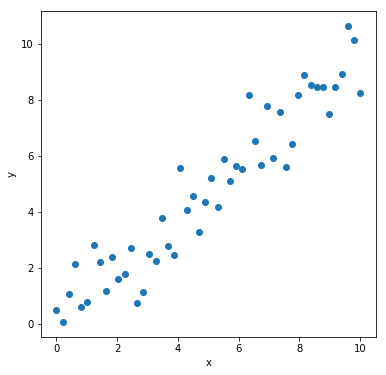

In [2]:
np.random.seed(42)
x = np.linspace(0,10)
y = x + np.random.normal(0, 1, x.shape)

plt.figure(figsize=(6, 6))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

There are $50$ observations (the default value in [numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html))

Split the train/valid datasets: for train the first 40 points, and for valid the last 10 points

In [0]:
x1 = x[...,None] # we add a dimension so that RandomForestRegressor doesn't complain

In [0]:
x_trn, x_val = x1[:40], x1[40:]
y_trn, y_val = y[:40], y[40:]

In [0]:
m = RandomForestRegressor(n_estimators=100).fit(x_trn, y_trn)

Function to plot predictions vs actuals

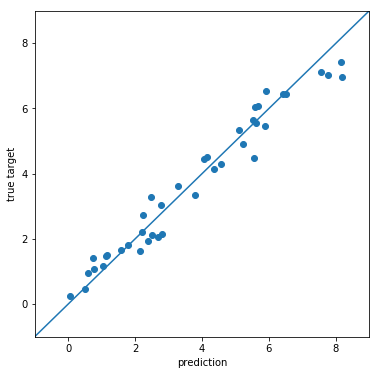

In [6]:
plt.figure(figsize=(6, 6))
plt.xlabel('prediction')
plt.ylabel('true target')
plt.xlim(-1, 9)
plt.ylim(-1, 9)
plt.plot(np.linspace(-1,9), np.linspace(-1,9))
plt.scatter(y_trn, m.predict(x_trn))
plt.show()

In the training set, the predictions work well (as expected)

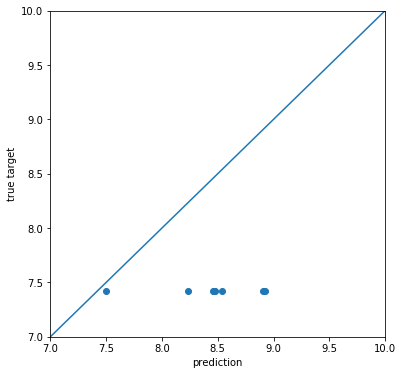

In [7]:
plt.figure(figsize=(6, 6))
plt.xlabel('prediction')
plt.ylabel('true target')
plt.xlim(7, 10)
plt.ylim(7, 10)
plt.plot(np.linspace(7,10), np.linspace(7,10))
plt.scatter(y_val, m.predict(x_val))
plt.show()

Holy cow! In the test set, the predictions are completely off!

Sources:

This example is taken from Lesson6 of [FastAI ML](http://course18.fast.ai/ml.html). To check it out, see this [direct link](https://youtu.be/BFIYUvBRTpE?t=5086).